In [26]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization,Activation
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

import pydot
import graphviz

In [27]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [29]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [30]:
print('Valor mínimo: ', x_train.min())
print('Valor máximo: ',x_train.max())

Valor mínimo:  0
Valor máximo:  255


In [31]:
# Determinar el tamaño del conjunto de entrenamiento (80% del total)
num_train = int(0.8 * x_train.shape[0])

# Dividir el conjunto de datos original de entrenamiento en un nuevo conjunto de entrenamiento y de validación
x_train, x_val = x_train[:num_train], x_train[num_train:]
y_train, y_val = y_train[:num_train], y_train[num_train:]

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

x_train shape: (48000, 28, 28)
x_val shape: (12000, 28, 28)
y_train shape: (48000,)
y_val shape: (12000,)


In [32]:
def visualize_dataset(n,x,y):
    plt.figure(figsize=(10,10))
    for i in range(n*n):
        plt.subplot(n,n,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i], cmap=plt.get_cmap('gray'))
        plt.xlabel(y[i])
    plt.show()

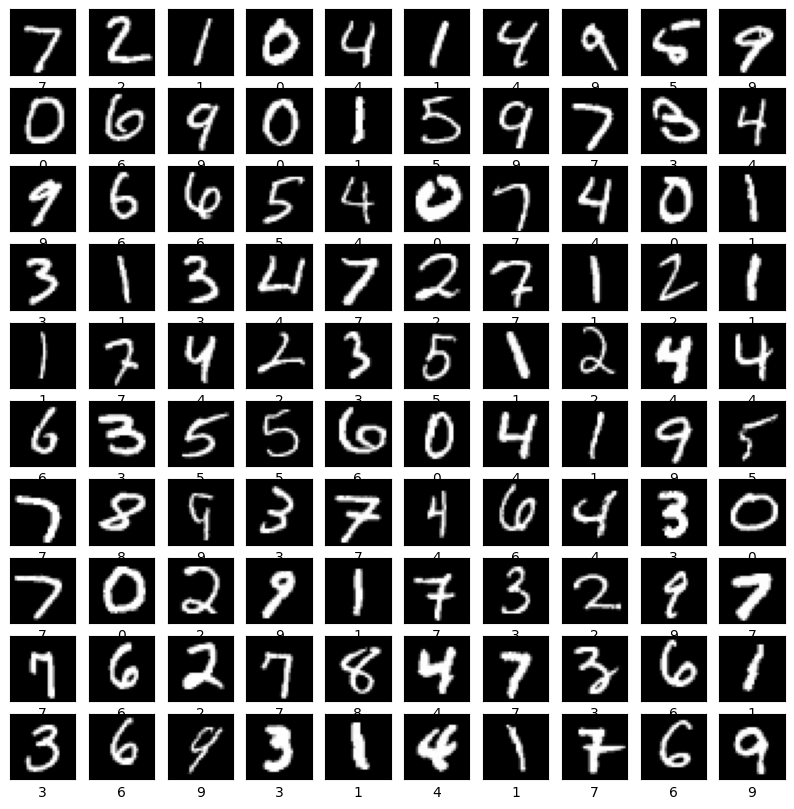

In [33]:
visualize_dataset(10, x_test, y_test)

In [34]:
# Redimensionamiento de los Conjuntos de Datos
x_train = x_train.reshape(-1, 28, 28, 1)  
x_test = x_test.reshape(-1, 28, 28, 1)   
x_val = x_val.reshape(-1, 28, 28, 1)

In [35]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val/ 255.0

In [36]:
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)
# y_val = tf.keras.utils.to_categorical(y_val)

In [37]:
x_val.shape

(12000, 28, 28, 1)

In [38]:
# Definición del primer modelo
model_1 = Sequential()

# Capa convolucional 1
model_1.add(Conv2D(128, (3, 3), input_shape=(28, 28, 1), padding="same", kernel_regularizer=l2(0.001)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPool2D(2, 2))
model_1.add(Dropout(0.3)) 

# Capa convolucional 2
model_1.add(Conv2D(32, (3, 3), padding="same", kernel_regularizer=l2(0.001)))
model_1.add(BatchNormalization())
model_1.add(Activation('relu'))
model_1.add(MaxPool2D(2, 2))
model_1.add(Dropout(0.25))

# Aplanamiento y capas densas
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(10, activation='softmax'))

In [44]:
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy']) #optimizer, loss, metric
# model_1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) #optimizer, loss, metric

In [45]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 28, 28, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)       

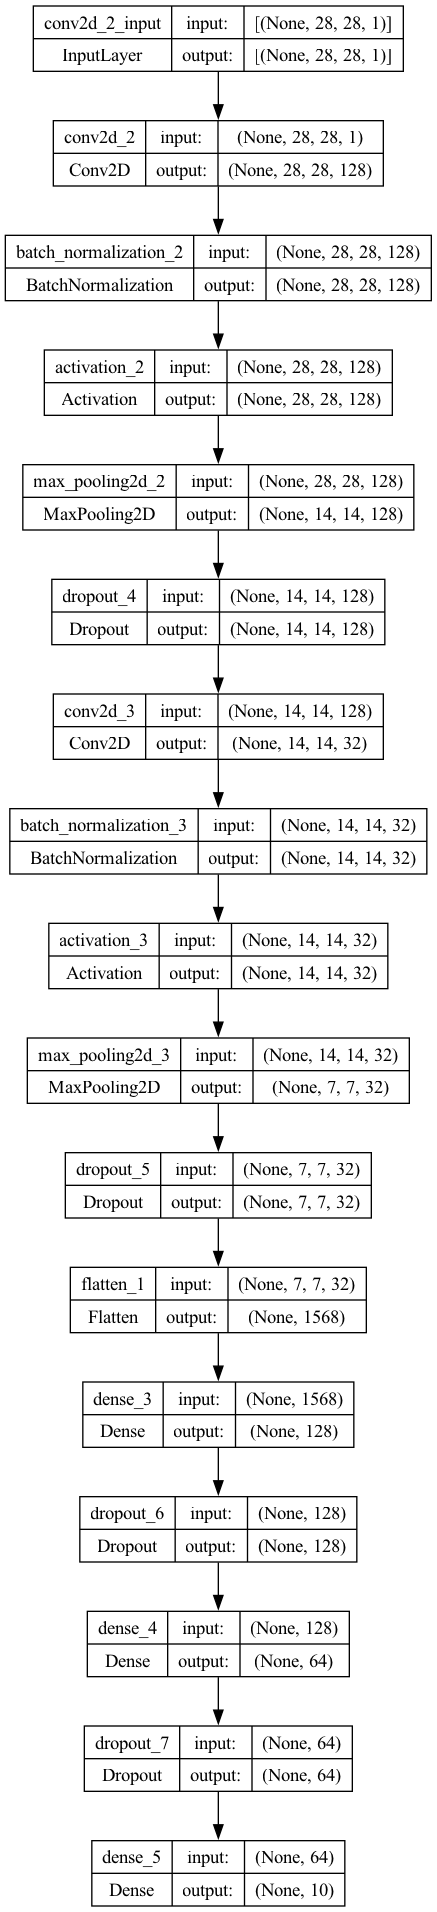

In [46]:
plot_model(model_1, show_shapes=True)

In [47]:
es = EarlyStopping(monitor='val_loss', patience=5,  mode='min',  verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint("/Users/davidclemente/Documents/GitHub/MLWithFramework/best_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [48]:
history_1 = model_1.fit(x_train, y_train, validation_data=(x_val, y_val),callbacks=[es, checkpoint] ,epochs=15,verbose=1)

Epoch 1/15
1498/1500 [============================>.] - ETA: 0s - loss: 0.6565 - accuracy: 0.8046
Epoch 1: val_loss improved from inf to 0.13513, saving model to /Users/davidclemente/Documents/GitHub/MLWithFramework/best_model.h5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.6560 - accuracy: 0.8047 - val_loss: 0.1351 - val_accuracy: 0.9747
Epoch 2/15
   9/1500 [..............................] - ETA: 23s - loss: 0.2667 - accuracy: 0.9375

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1498/1500 [============================>.] - ETA: 0s - loss: 0.2769 - accuracy: 0.9350
Epoch 2: val_loss improved from 0.13513 to 0.10786, saving model to /Users/davidclemente/Documents/GitHub/MLWithFramework/best_model.h5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.2769 - accuracy: 0.9351 - val_loss: 0.1079 - val_accuracy: 0.9814
Epoch 3/15
1498/1500 [============================>.] - ETA: 0s - loss: 0.2168 - accuracy: 0.9503
Epoch 3: val_loss improved from 0.10786 to 0.09628, saving model to /Users/davidclemente/Documents/GitHub/MLWithFramework/best_model.h5
1500/1500 [==============================] - 26s 18ms/step - loss: 0.2168 - accuracy: 0.9502 - val_loss: 0.0963 - val_accuracy: 0.9858
Epoch 4/15
1500/1500 [==============================] - ETA: 0s - loss: 0.1982 - accuracy: 0.9573
Epoch 4: val_loss did not improve from 0.09628
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1982 - accuracy: 0.9573 - val_loss: 0.1015 - val_accuracy: 

In [49]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0853 - accuracy: 0.9875


[0.08531393110752106, 0.987500011920929]

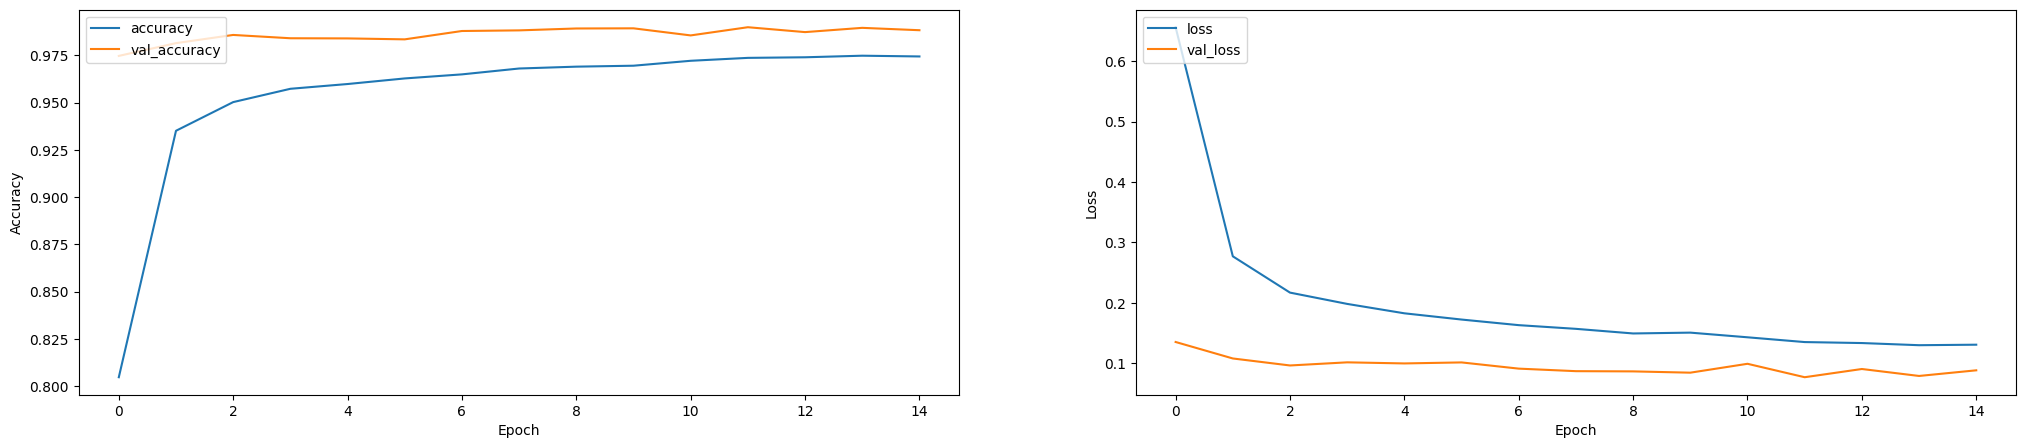

In [50]:
fig, axs = plt.subplots(1, 2,figsize=(25, 5))
axs[0].plot(history_1.history['accuracy'], label='accuracy')
axs[0].plot(history_1.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='upper left')

axs[1].plot(history_1.history['loss'], label='loss')
axs[1].plot(history_1.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper left')
plt.show()

In [51]:
y_pred = np.argmax(model_1.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [25]:
print(y_test.shape)
print(y_pred.shape)


(10000, 10)
(10000,)


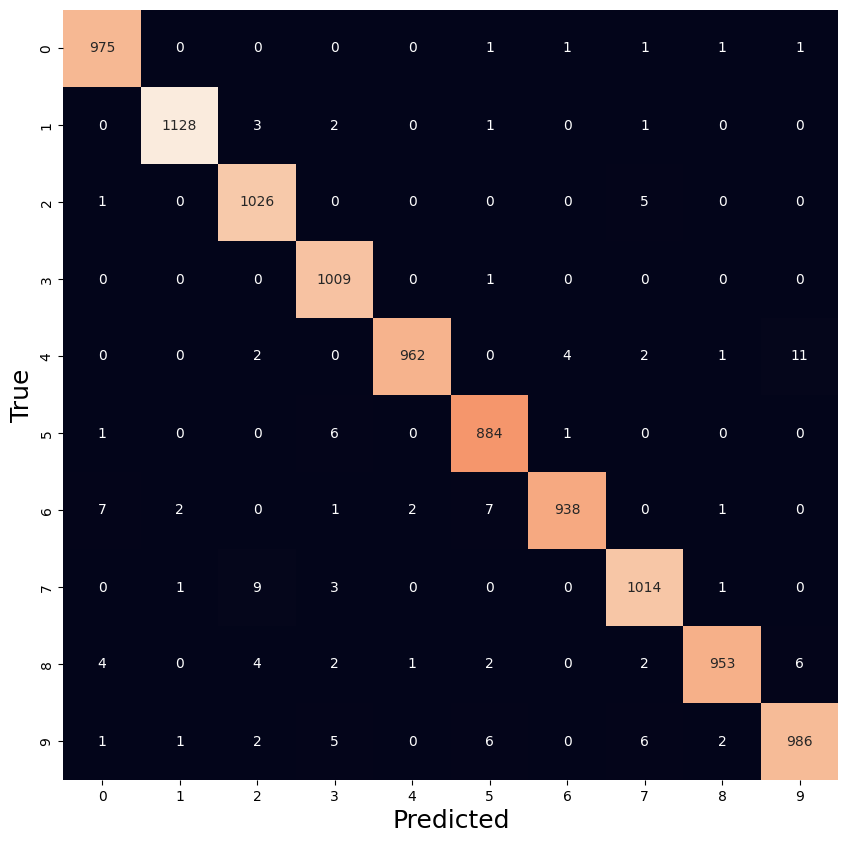

In [53]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cf_matrix, annot=True,cbar=False,fmt='d')
plt.xlabel("Predicted", fontsize = 18)
plt.ylabel("True", fontsize = 18)
plt.show()

In [54]:
# Compara las clases predichas con las verdaderas
errors = y_pred != y_test

# Imágenes mal clasificadas
misclassified_images = x_test[errors]
misclassified_labels_true = y_test[errors]
misclassified_labels_pred = y_pred[errors]


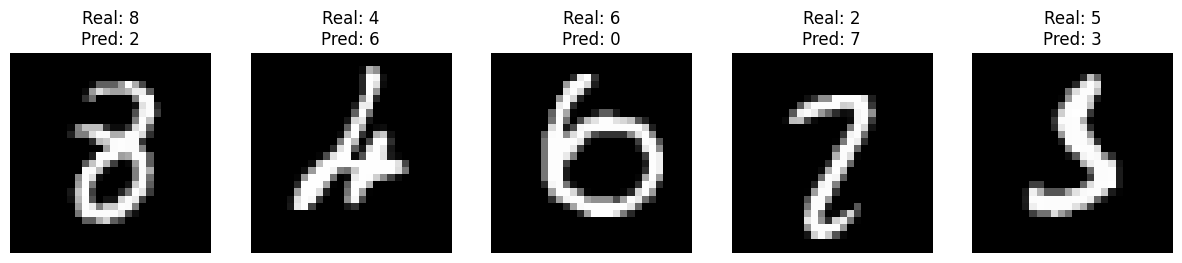

In [56]:
# Función para visualizar imágenes mal clasificadas
def plot_misclassified_images(images, true_labels, predicted_labels, n=5):
    plt.figure(figsize=(15, 4))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(np.squeeze(images[i]), cmap='gray')
        plt.title(f"Real: {true_labels[i]}\nPred: {predicted_labels[i]}")
        plt.axis('off')
    plt.show()

plot_misclassified_images(misclassified_images, misclassified_labels_true, misclassified_labels_pred, n=5)


In [57]:
def plot_classification(images, true_labels, predicted_labels, n=5):
    correct = np.where(predicted_labels == true_labels)[0]

    plt.figure(figsize=(15, 4))
    for i, correct_idx in enumerate(correct[:n]):
        plt.subplot(1, n, i + 1)
        plt.imshow(np.squeeze(images[correct_idx]), cmap='gray')
        plt.title(f"Real: {true_labels[correct_idx]}\nPred: {predicted_labels[correct_idx]}")
        plt.axis('off')
    plt.show()

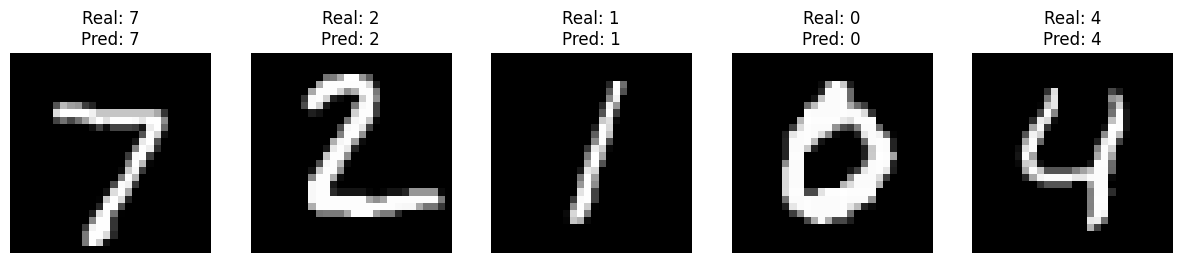

In [58]:
plot_classification(x_test, y_test, y_pred, n=5)

In [59]:
def plot_prediction(index):
    print('Valor real: ',y_test[index])
    print('Predicción: ',y_pred[index])
    plt.figure(figsize=(6,3))
    plt.imshow(x_test[index], cmap='gray')
    plt.axis('off')
    plt.show()

Valor real:  3
Predicción:  3


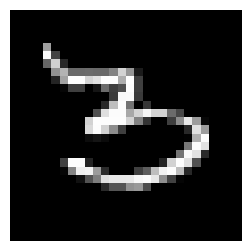

In [60]:
i = 245
plot_prediction(i)